# Загрузка данных

Название: "Quality Prediction in a Mining Process"

Ресурс: https://www.kaggle.com/datasets/edumagalhaes/quality-prediction-in-a-mining-process/data

Формат файла: zip

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

files.upload()  # upload the kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"iamalekselion","key":"bc21ac235de531c9787bb40320fd2dab"}'}

In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d edumagalhaes/quality-prediction-in-a-mining-process
!unzip quality-prediction-in-a-mining-process.zip
# MiningProcess_Flotation_Plant_Database.csv

 84% 43.0M/50.9M [00:00<00:00, 99.2MB/s]
100% 50.9M/50.9M [00:00<00:00, 96.0MB/s]
Archive:  quality-prediction-in-a-mining-process.zip
  inflating: MiningProcess_Flotation_Plant_Database.csv  


# Анализ данных

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv(
    "MiningProcess_Flotation_Plant_Database.csv",
    parse_dates=['date'],
    infer_datetime_format=True,
    decimal=','
).drop_duplicates()

dataset

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,...,313.695,392.160,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
737449,2017-09-09 23:00:00,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,...,236.700,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
737450,2017-09-09 23:00:00,49.75,23.20,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,...,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.130,64.27,1.71
737451,2017-09-09 23:00:00,49.75,23.20,1164.12,491.548,384.976,9.61686,1.65324,302.550,301.959,...,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 736282 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          736282 non-null  datetime64[ns]
 1   % Iron Feed                   736282 non-null  float64       
 2   % Silica Feed                 736282 non-null  float64       
 3   Starch Flow                   736282 non-null  float64       
 4   Amina Flow                    736282 non-null  float64       
 5   Ore Pulp Flow                 736282 non-null  float64       
 6   Ore Pulp pH                   736282 non-null  float64       
 7   Ore Pulp Density              736282 non-null  float64       
 8   Flotation Column 01 Air Flow  736282 non-null  float64       
 9   Flotation Column 02 Air Flow  736282 non-null  float64       
 10  Flotation Column 03 Air Flow  736282 non-null  float64       
 11  Flotation Col

In [ ]:
dataset.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,...,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.00000,736282.000000,736282.000000,736282.000000,736282.000000
mean,56.298307,14.648984,2869.636615,488.165523,397.570736,9.767315,1.680424,280.119813,277.121249,281.052538,...,290.740507,520.168402,522.555279,531.283790,420.169753,425.09453,429.889517,420.910258,65.049096,2.327270
std,5.160365,6.810741,1216.017896,91.254428,9.705444,0.387176,0.069206,29.633831,30.157126,28.571077,...,28.690520,131.085819,128.216232,150.931865,91.755819,84.47917,89.919586,84.899167,1.118721,1.125616
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,...,185.962000,149.218000,210.752000,126.255000,162.201000,166.99100,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2075.070000,431.835848,394.248000,9.527050,1.647390,250.278000,250.448000,250.847000,...,256.047750,416.902000,441.835250,411.256000,356.627000,357.59525,358.438000,356.705250,64.370000,1.440000
50%,56.080000,13.850000,3020.230000,504.352500,399.238000,9.797460,1.697580,299.341000,296.202000,298.690000,...,299.002000,491.749000,495.853500,494.184000,411.770500,408.65000,424.427000,410.940000,65.210000,2.000000
75%,59.720000,19.600000,3728.930000,553.335750,402.967000,10.037800,1.728380,300.147000,300.686000,300.385000,...,301.907000,594.097750,595.293000,601.299000,485.285000,484.00800,492.773000,476.145000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,...,371.593000,862.274000,828.919000,886.822000,680.359000,675.64400,698.861000,659.902000,68.010000,5.530000


*   count = количество записей
*   mean = медиана
*   std = cреднеквадратическое отклонение
*   min = минимальное значение в колонке
*   max = максимальное значение в колонке

# Визуализация данных

## Гистограммы

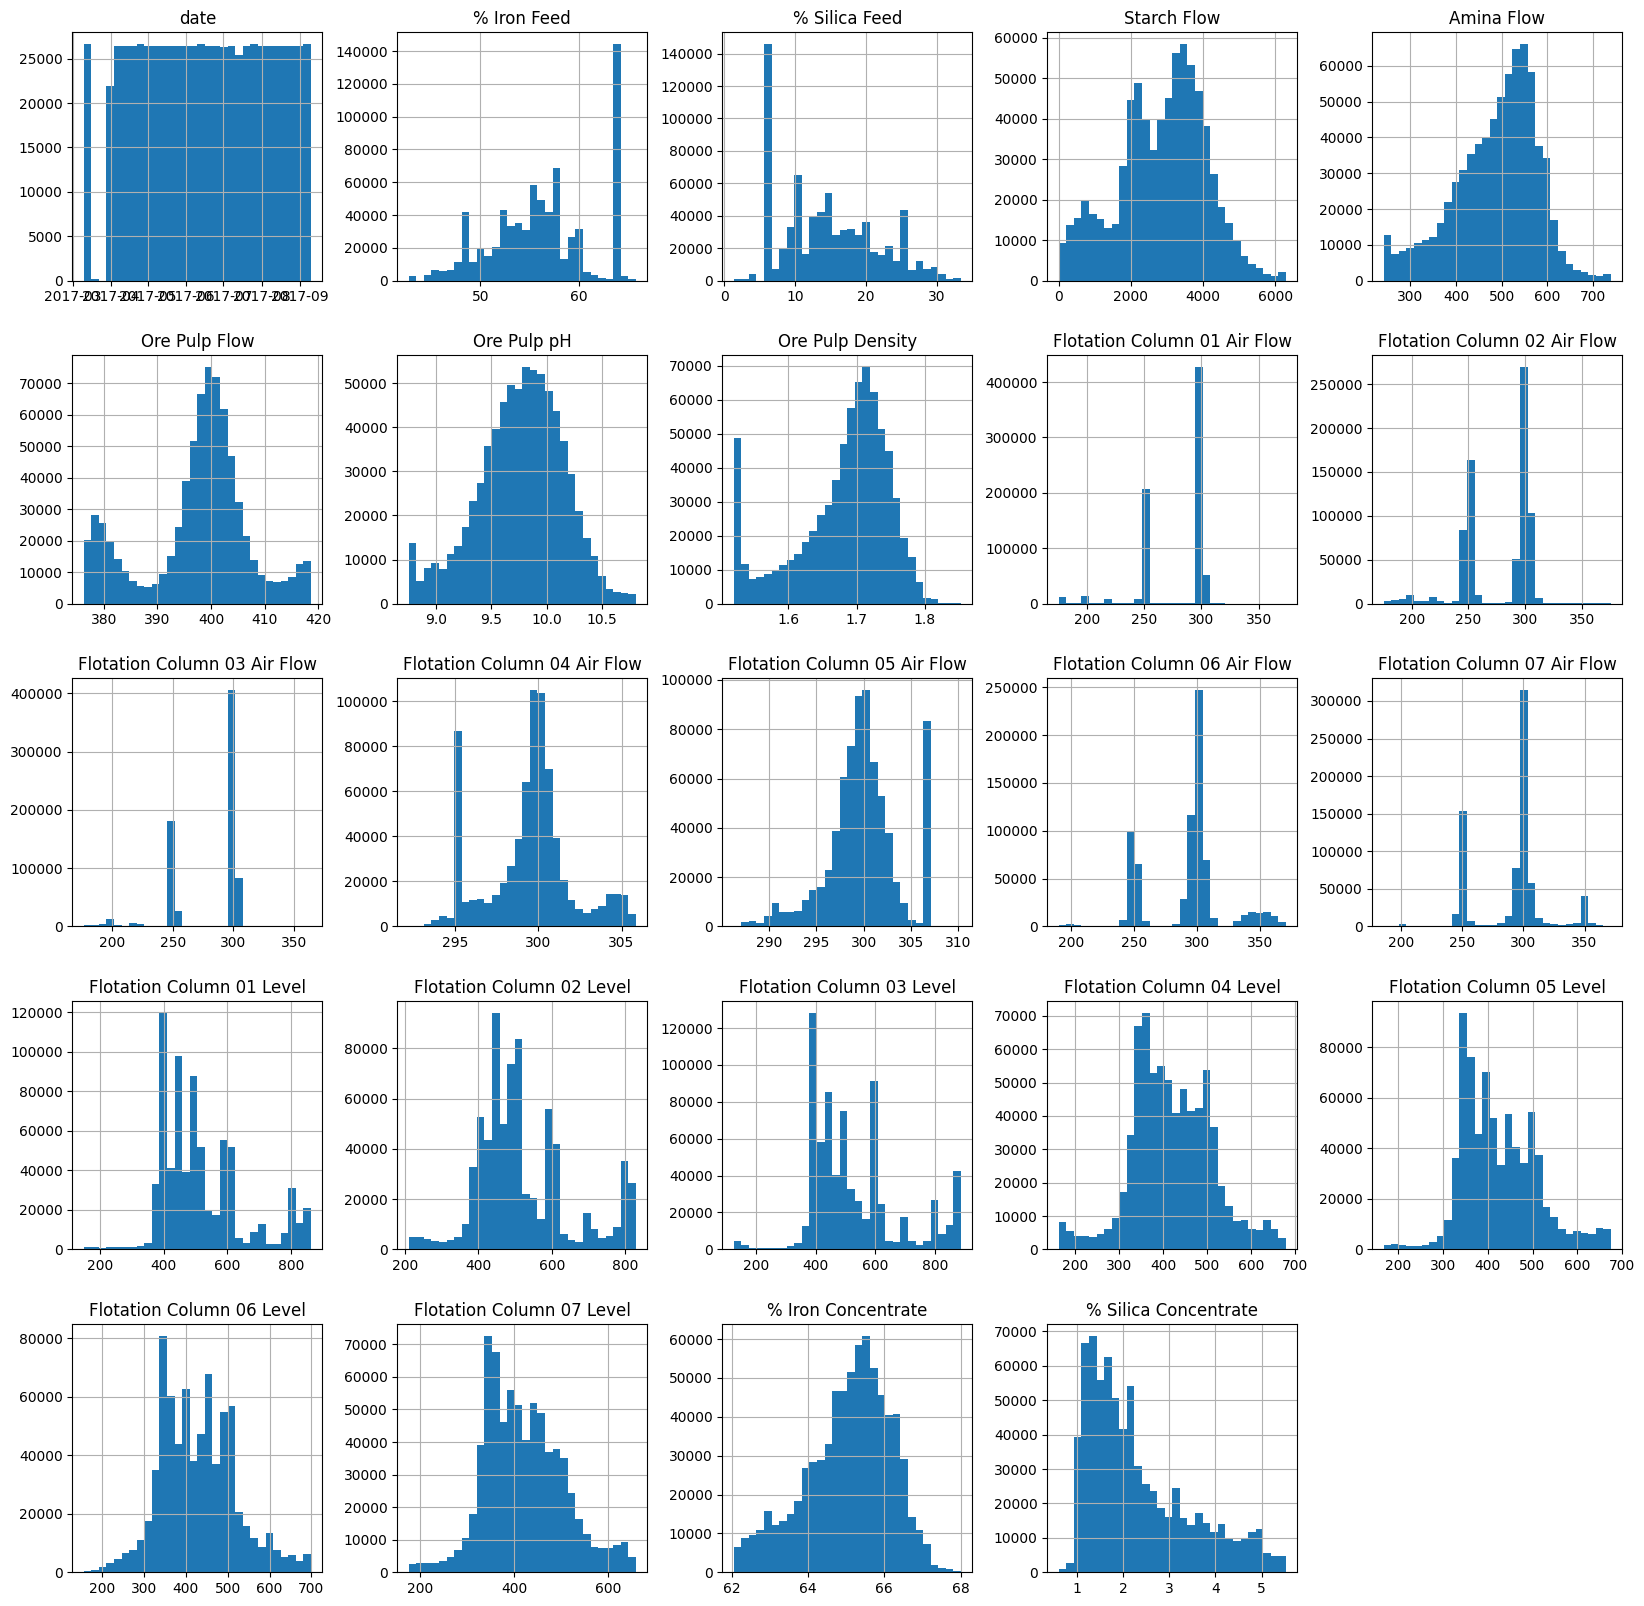

In [ ]:
dataset.hist(bins=30, figsize=(20, 20))
plt.title('Histogram plot of all features')
plt.show()

## Диаграммы рассеивания

In [ ]:
sns.pairplot(data=dataset[dataset.columns[1:8]])

Output hidden; open in https://colab.research.google.com to view.

## Корреляционная матрица

<ipython-input-48-bd2c78c6b020>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=dataset.corr(), annot=True, cmap="viridis", fmt=".2f")


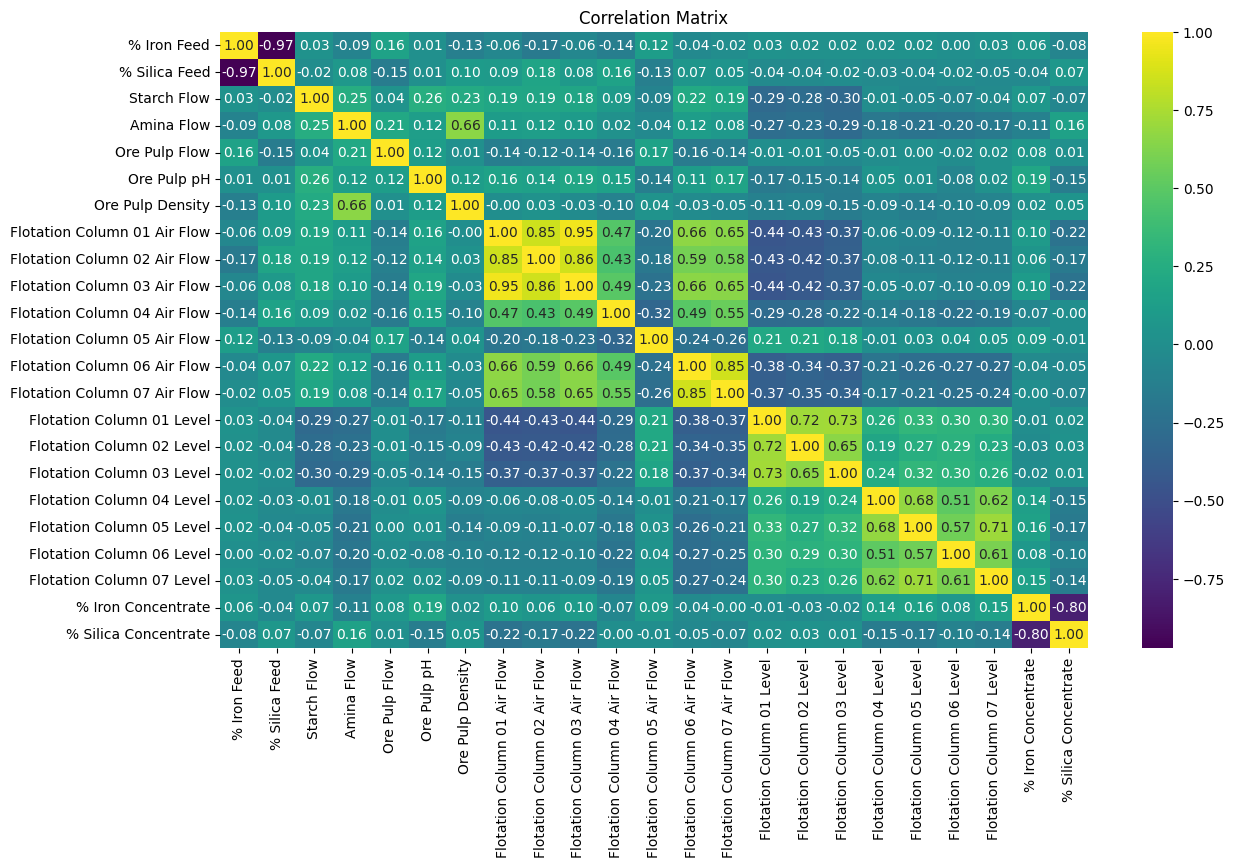

In [ ]:
plt.figure(figsize=(14, 8), dpi=100)
sns.heatmap(data=dataset.corr(), annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()